In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
cd ..

/home/jovyan/UCLA_CSX_450_2_2018_W-1/12-wholesale_customers-4


In [3]:
run src/load_data.py

In [4]:
whos 

Variable             Type              Data/Info
------------------------------------------------
StandardScaler       type              <class 'sklearn.preproces<...>ing.data.StandardScaler'>
customer_df          DataFrame              Fresh   Milk  Grocer<...>n\n[440 rows x 6 columns]
customer_final_df    DataFrame                 Fresh      Milk  <...>n\n[435 rows x 6 columns]
customer_log_df      DataFrame                  Fresh       Milk<...>n\n[440 rows x 6 columns]
customer_log_sc      ndarray           440x6: 2640 elems, type `float64`, 21120 bytes
customer_log_sc_df   DataFrame                 Fresh      Milk  <...>n\n[440 rows x 6 columns]
customer_sc          ndarray           440x6: 2640 elems, type `float64`, 21120 bytes
customer_sc_df       DataFrame                 Fresh      Milk  <...>n\n[440 rows x 6 columns]
np                   module            <module 'numpy' from '/op<...>kages/numpy/__init__.py'>
pd                   module            <module 'pandas' from '/o<

In [5]:
np.random.seed(42)

sample_df = customer_final_df.sample(5)
sample_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
285,1.273141,-1.536573,-0.228089,-0.275900,-0.416876,-2.883317
81,-2.273184,0.965103,1.020533,-1.291873,1.272290,-1.249410
116,0.400649,-0.267562,-0.291553,0.017198,-0.616071,-0.977898
258,1.498892,0.281951,-0.703149,1.143766,-0.115584,1.111985
329,-0.131439,-0.756990,-0.010698,0.967911,-0.346264,-0.049861


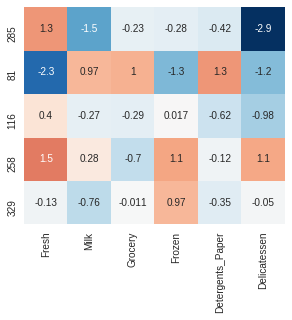

In [6]:
sns.heatmap(sample_df, annot=True, cbar=False, square=True)

In [7]:
customer_df.mean()

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

In [8]:
customer_df.iloc[[285, 81, 116, 258, 329]]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
285,40254,640,3600,1042,436,18
81,219,9540,14403,283,7818,156
116,11173,2521,3355,1517,310,222
258,56083,4563,2124,6422,730,3321
329,5113,1486,4583,5127,492,739


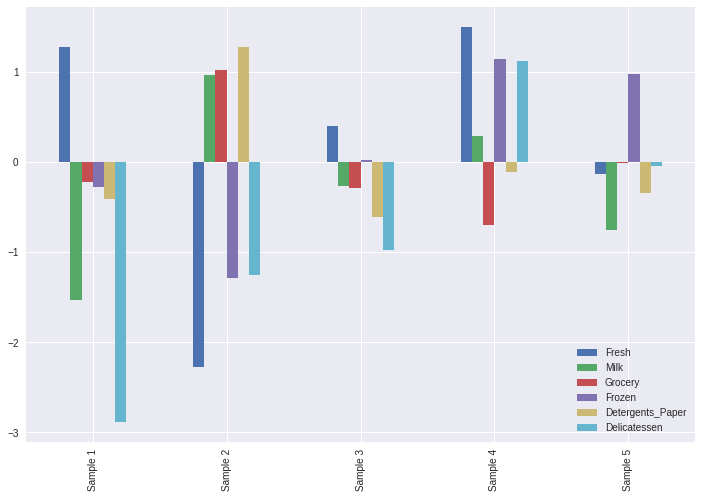

In [9]:
sample_df.plot(kind='bar', figsize=(12,8))
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

## Principal Component Analysis

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA()
pca.fit(customer_final_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### Scree Plot

Look for "the bend". This will tell you how many components to keep.

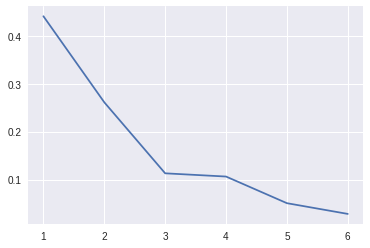

In [12]:
plt.plot( range(1, 7), pca.explained_variance_ratio_)

In [13]:
customer_log_sc_df.cov()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.002278,-0.021144,-0.133292,0.387138,-0.159068,0.257026
Milk,-0.021144,1.002278,0.762861,-0.055354,0.680271,0.343090
Grocery,-0.133292,0.762861,1.002278,-0.164900,0.798957,0.240544
Frozen,0.387138,-0.055354,-0.164900,1.002278,-0.213256,0.256902
Detergents_Paper,-0.159068,0.680271,0.798957,-0.213256,1.002278,0.167955
Delicatessen,0.257026,0.343090,0.240544,0.256902,0.167955,1.002278


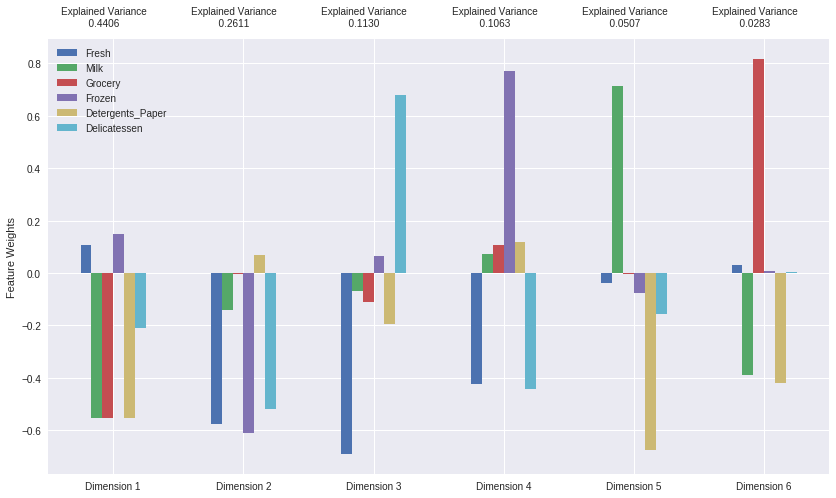

In [14]:
import lib.viz_helper as viz
pca_df = viz.pca_results(customer_final_df, pca)

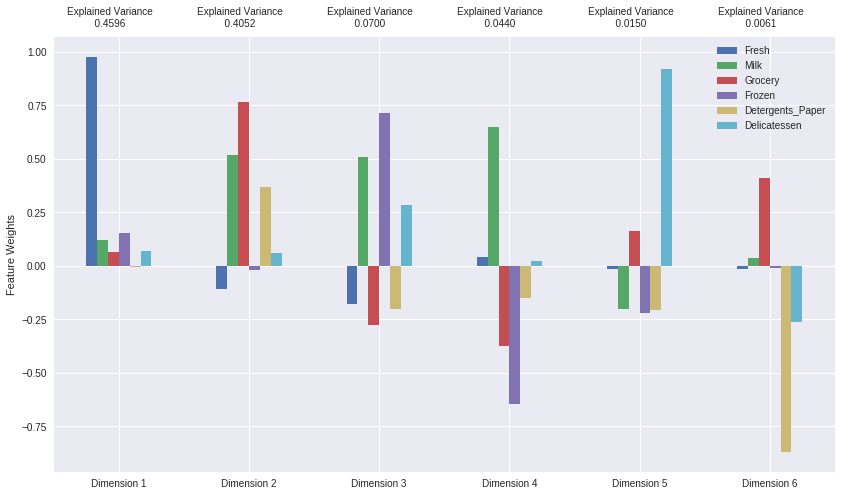

In [15]:
pca = PCA()
pca.fit(customer_df)
pca_df = viz.pca_results(customer_df, pca)

In [16]:
pca = PCA(n_components=2)
pca.fit(customer_final_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
customer_pca_df = pd.DataFrame(pca.transform(customer_final_df), 
                               columns=['Dim 1', 'Dim 2'],
                               index=customer_final_df.index)
sample_pca_df = pd.DataFrame(pca.transform(sample_df), 
                             columns=['Dim 1', 'Dim 2'],
                             index=sample_df.index)

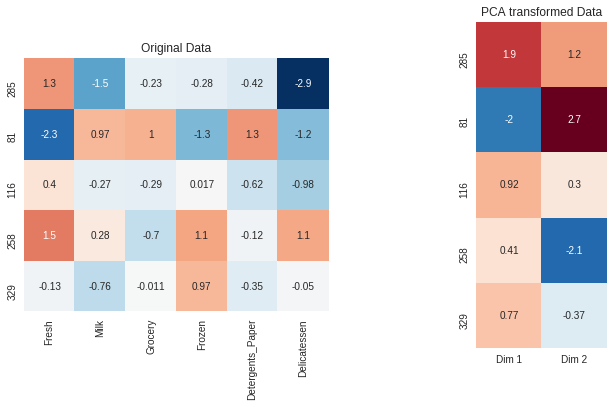

In [18]:
fig = plt.figure(figsize=(12,6))
fig.add_subplot(121)
plt.title("Original Data")
sns.heatmap(sample_df, annot=True, cbar=False, square=True)
fig.add_subplot(122)
plt.title("PCA transformed Data")
sns.heatmap(sample_pca_df, annot=True, cbar=False, square=True)

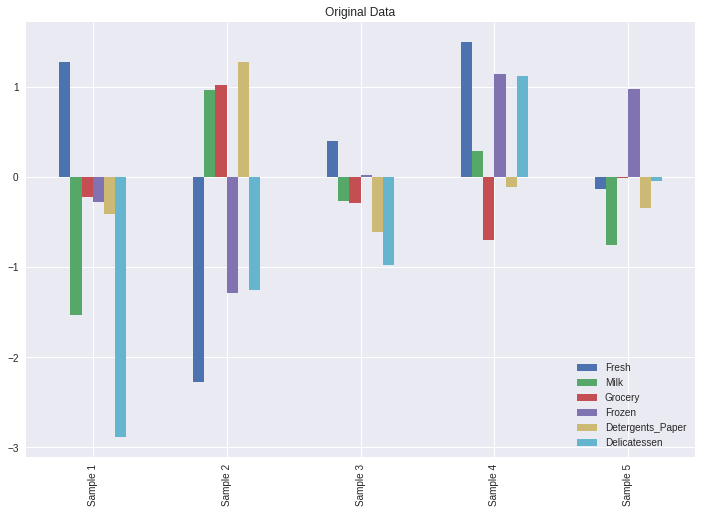

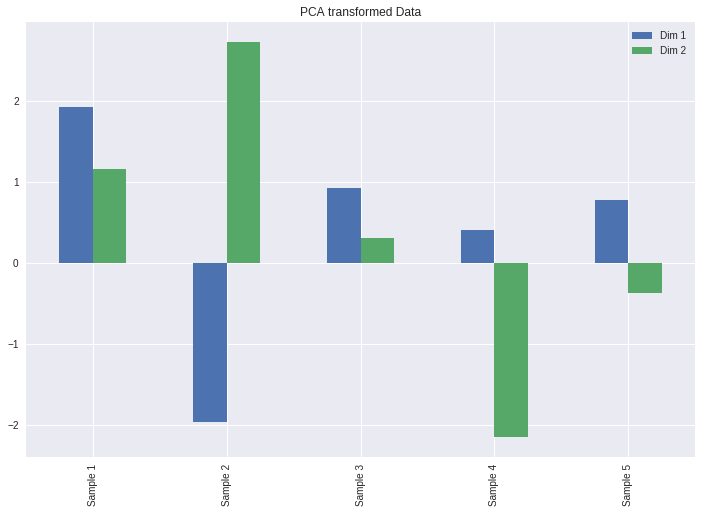

In [19]:
sample_df.plot(kind='bar', figsize=(12,8))
plt.title("Original Data")
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

sample_pca_df.plot(kind='bar', figsize=(12,8))
plt.title("PCA transformed Data")
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

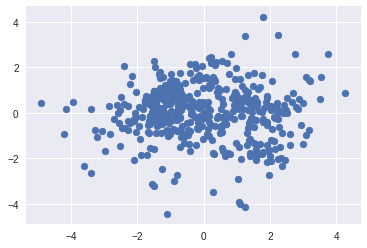

In [20]:
plt.scatter(-customer_pca_df['Dim 1'], -customer_pca_df['Dim 2'])
